In [ ]:
#Matplotlib from scratch


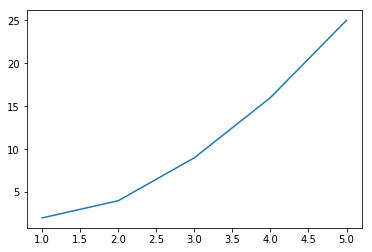

In [15]:
from matplotlib import pyplot as plt
x=[1,2,3,4,5]

y=[2,4,9,16,25]

plt.plot(x,y)
plt.show()

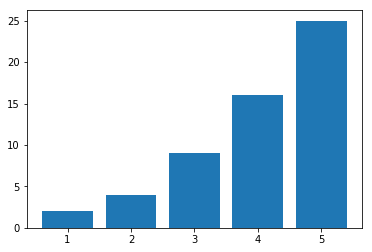

In [4]:
x=[1,2,3,4,5]

y=[2,4,9,16,25]

plt.bar(x,y)
plt.show()

(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

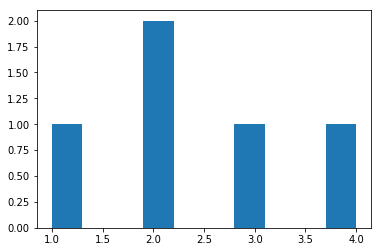

In [6]:
z=[1,2,2,3,4]
plt.hist(z) #plots the frequency of numbers in list

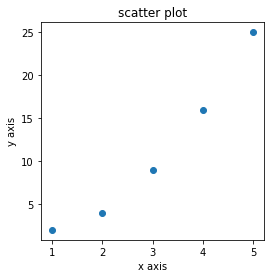

In [13]:
plt.figure(figsize=[4,4])
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("scatter plot")
plt.scatter(x,y)

In [ ]:
#Pokemon data
#https://www.kaggle.com/abcsds/pokemon/downloads/pokemon.zip/2

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\91808\Desktop\Practise2_08_08\pokemon\Pokemon.csv")

In [44]:
df.size

10400

In [46]:
df.shape

(800, 13)

In [47]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


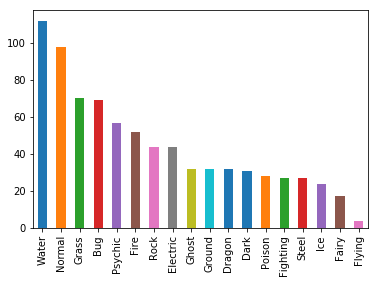

In [4]:
df['Type 1'].value_counts().plot(kind='bar')

In [61]:
# If you have comparative data that you would like to represent through a chart then a bar chart is the best option.
#A bar chart uses bars to show comparisons between categories of data.
#These bars can be displayed horizontally or vertically. 
#A bar graph will always have two axis. One axis will generally have numerical values, and the 
#other will describe the types of categories being compared.

# Advantages and disadvantages of using bar charts

# Advantage is the bar chart is easy to read and understand. You get a good overview of values when using bar charts.
# The bar chart does not work so well with many dimension values due to the limitation of the axis length. '""


In [ ]:
#CUSTOMIZATION OF GRAPH

# 1) Adjusting size of the figure: You can change of the figure using plt.figure(figsize=(x,y)) where you can set x and y values to satisfy your requirements

# 2) Axes labels and title: Use plt.title('Title') on the axes to set the title of the plot and plt.xlabel('xlabel'), plt.ylabel('ylabel') to set the labels

# 3) Axes limits: Use plt.xlim((a,b)) and plt.ylim((a,b)) to fix the boundaries in the range (a,b) within which you want to display the plot

# 4) Changing color: Use the color argument inside the different types of plot functions to change its color.

# 5) Legends: In case we have multiple types of charts in single plot, you can differentiate them with legends. Use plt.legend() to display legends with the help of the labels keyword argument inside it. To

# 6) Save figure: You can easily save a figure to, for example, a png file by making use of plt.savefig(). The only argument you need to pass to this function is the file name, just like in this example:



In [ ]:
#Stacked barchart
#Whixh type 1 pokemon is most sussesptible to be a legendary pokemon

(18, 2)
Legendary  False  True 
Type 1                 
Bug         69.0    NaN
Dark        29.0    2.0
Dragon      20.0   12.0
Electric    40.0    4.0
Fairy       16.0    1.0
Fighting    27.0    NaN
Fire        47.0    5.0
Flying       2.0    2.0
Ghost       30.0    2.0
Grass       67.0    3.0
Ground      28.0    4.0
Ice         22.0    2.0
Normal      96.0    2.0
Poison      28.0    NaN
Psychic     43.0   14.0
Rock        40.0    4.0
Steel       23.0    4.0
Water      108.0    4.0


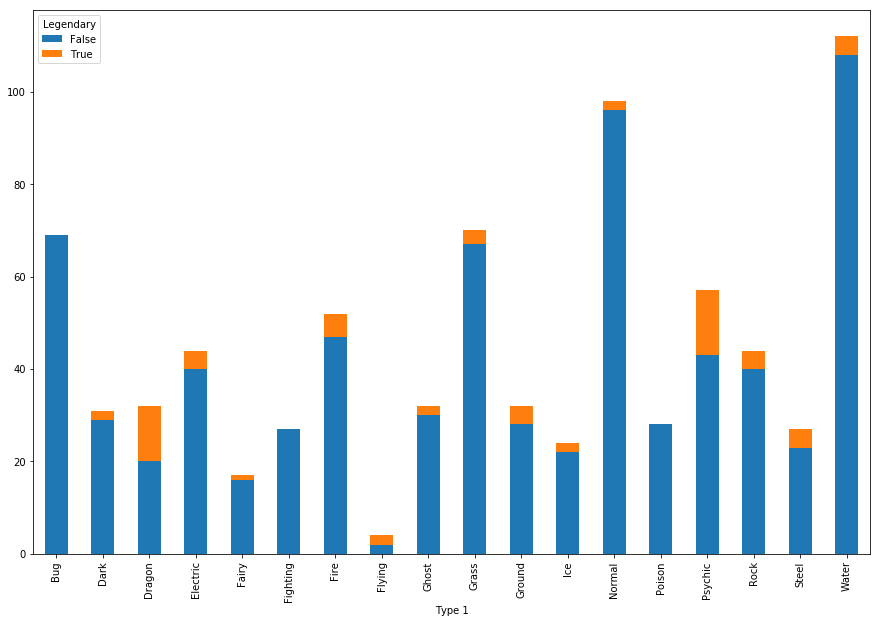

In [31]:
a=df.groupby(['Type 1','Legendary']).size().unstack()
print(a.shape)
print(a)
#Intially when we dont use unstack, the size of data is (33,), use of unstack helps to create 2 more columns viz.False and True
#thus reducing changing to (16,2)
#unstacking usually makes data shorter and wider or broader and stcking does the reverse
#https://sites.ualberta.ca/~hadavand/DataAnalysis/notebooks/Reshaping_Pandas.html
df.groupby(['Type 1', 'Legendary']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10))


In [ ]:
#We can infer that most of the legendary pokemon belong to Psychic and Dragon type

      Attack_x      Name    Attack_y
0    70.971014       Bug   90.000000
1    88.387097      Dark  109.800000
2   112.125000    Dragon   94.444444
3    69.090909  Electric   72.666667
4    61.529412     Fairy   61.608696
5    96.777778  Fighting  112.846154
6    84.769231      Fire   81.250000
7    78.750000    Flying   80.288660
8    73.781250     Ghost   84.142857
9    73.214286     Grass   74.160000
10   95.750000    Ground   89.857143
11   72.750000       Ice   98.000000
12   73.469388    Normal   52.750000
13   74.678571    Poison   67.588235
14   71.456140   Psychic   74.696970
15   92.863636      Rock   84.000000
16   92.703704     Steel   92.590909
17   74.151786     Water   70.142857


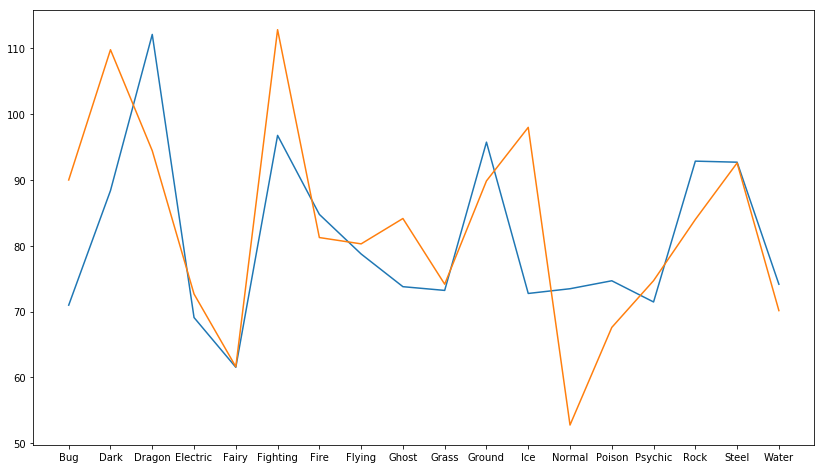

In [87]:
# Lets answer this question: How does the mean attack (Attack) points Type 1 Pokemons fare against Type 2 Pokemons?

type_1=df.groupby(['Type 1'])['Attack'].mean()
type_2=df.groupby(['Type 2'])['Attack'].mean()
ar1=type_1.to_frame() #converted series to dataframe
ar1.reset_index(inplace=True) #initially 'Type 1' was seving as index hence added new index of 0,1,2.. to consider Type 1 as
#separate column
ar2=type_2.to_frame()
ar2.reset_index(inplace=True)
merge=pd.merge(ar1,ar2,left_on='Type 1',right_on='Type 2') #merged both the dataframes
#https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/
merge.drop('Type 1',axis=1,inplace=True) #Removed Type 1 as column since Type 2 is enough
merge.columns=['Attack_x','Name','Attack_y'] #renamed Type 2 as Name
print(merge)
plt.figure(figsize=[14,8])

plt.plot(merge['Name'],merge['Attack_x'])
plt.plot(merge['Name'],merge['Attack_y'])
plt.show()

In [ ]:
# # #HISTOGRAMS
# # A histogram is a plot that lets you discover, and show, 
# the underlying frequency distribution (shape) of a set of continuous data. 
# This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, 
# skewness, etc. Note that it requires only one array or series since it displays the frequencies.



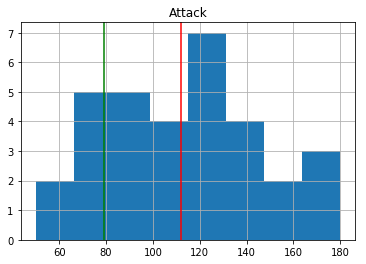

In [106]:
mean_attack=df['Attack'].mean()
dragon=df['Type 1']=='Dragon'
dra=df[dragon]
mean_dra=dra['Attack'].mean()
dra.hist(column='Attack',bins=8)
plt.axvline(x=mean_attack, color='green')
plt.axvline(x=mean_dra,color='red')
plt.show()

In [ ]:
# #SCATTER PLOT

# A scatter plot helps us determine if two quantities are weakly or strongly correlated. 
# Correlation implies that as one variable changes, the other also changes.
# While calculating the correlation coefficient will give us a precise number, 
# a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.



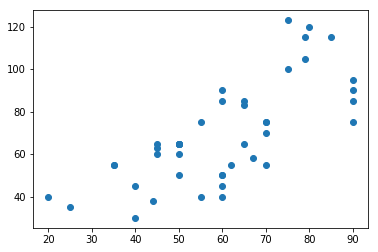

In [115]:
# Do electric pokemons have a correlation between their health and attack?

Elec=df['Type 1']=='Electric'
dfe=df[Elec]
plt.scatter(dfe['HP'],dfe['Attack'])

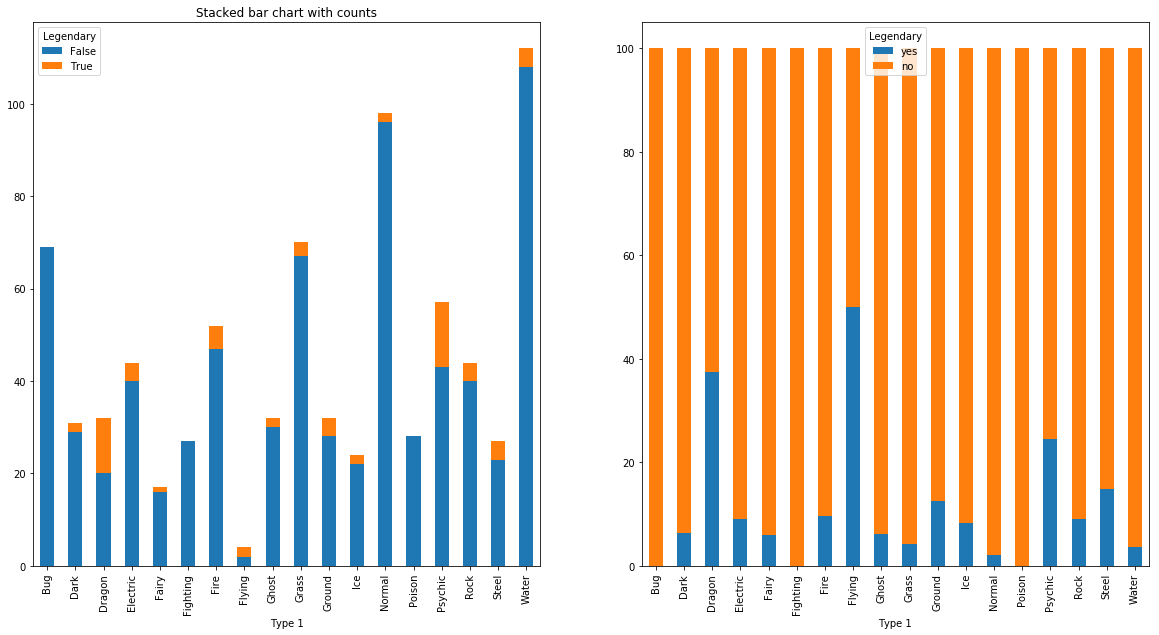

In [137]:
#SUB PLOTS

fig, (ax_1,ax_2)=plt.subplots(1,2,figsize=(20,10))
res=df.groupby(['Type 1','Legendary']).size().unstack()
res.plot(kind='bar',stacked=True,ax=ax_1)
ax_1.set_title("Stacked bar chart with counts")


new_res=res.fillna(0)
new_res['Total']=new_res[True]+new_res[False]

new_res['yes']=(new_res[True]/new_res['Total'])*100
new_res['no']=(new_res[False]/new_res['Total'])*100
new_res.drop('Total',inplace=True,axis=1)
new_res
new_res.drop(True,inplace=True,axis=1)
new_res.drop(False,inplace=True,axis=1)


new_res.plot(kind='bar',stacked=True,ax=ax_2)